#ASSIGNMENT 4

_To Load the libraries and IMDB Data_



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!pip install keras_preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras import preprocessing
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


Basic Model that means how embedding and cutoff works:

In [10]:
# I Considered only top 10,000 Words as per given question
maxi_features = 10000

# Set a Cut-Off Point for Reviews after 150 Words
maximumlen = 150

# To Load the Train and Test Datasets of the IMDB Example
(x_training, y_training), (x_testing, y_testing) = imdb.load_data(num_words=maxi_features)

# Pre-Processing to Convert the Texts into Numericals
x_training = pad_sequences(x_training, maxlen=maximumlen)
x_testing = pad_sequences(x_testing, maxlen=maximumlen)

17464789/17464789 [==============================] - 0s 0us/step


Building and SUmmary of the model:

In [12]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maximumlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To execute the model:

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Train the model
history = model.fit(
    x_training, y_training,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

# Saving the model after training
model.save("model1.keras")


Epoch 1/15
625/625 [==============================] - 4s 6ms/step - loss: 0.1522 - acc: 0.9463 - val_loss: 0.3358 - val_acc: 0.8672
Epoch 2/15
625/625 [==============================] - 4s 6ms/step - loss: 0.1331 - acc: 0.9548 - val_loss: 0.3443 - val_acc: 0.8652
Epoch 3/15
625/625 [==============================] - 7s 12ms/step - loss: 0.1152 - acc: 0.9628 - val_loss: 0.3552 - val_acc: 0.8634
Epoch 4/15
625/625 [==============================] - 4s 7ms/step - loss: 0.0993 - acc: 0.9696 - val_loss: 0.3669 - val_acc: 0.8644
Epoch 5/15
625/625 [==============================] - 4s 7ms/step - loss: 0.0843 - acc: 0.9754 - val_loss: 0.3826 - val_acc: 0.8622
Epoch 6/15
625/625 [==============================] - 5s 8ms/step - loss: 0.0712 - acc: 0.9803 - val_loss: 0.3960 - val_acc: 0.8616
Epoch 7/15
625/625 [==============================] - 4s 6ms/step - loss: 0.0600 - acc: 0.9844 - val_loss: 0.4126 - val_acc: 0.8598
Epoch 8/15
625/625 [==============================] - 4s 6ms/step - loss: 0

plotting the graph for the training ,validation loss and accuracy

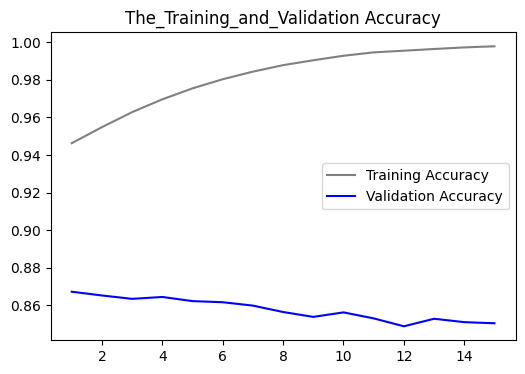

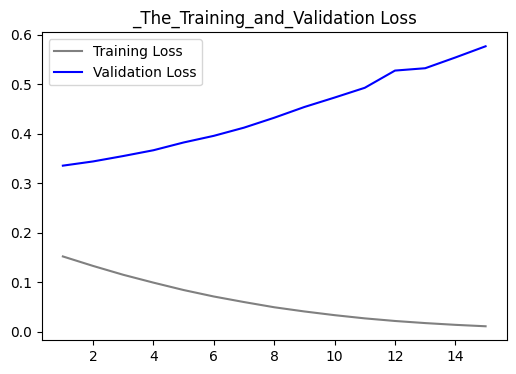

In [29]:
from tensorflow.keras.models import load_model

# Load the saved model
model1 = load_model("model1.keras")
# Access the history of the loaded model
accuracy = history.history['acc']  # using the 'history' variable from model.fit() instead of model1.history
val_accuracy = history.history['val_acc']
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("The_Training_and_Validation Accuracy")
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("_The_Training_and_Validation Loss")
plt.legend()
plt.show()

In [31]:
test_model = load_model('model1.keras')
Model1_Results = test_model.evaluate(x_testing,y_testing)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.5669 - acc: 0.8448
Loss: 0.567
Accuracy: 0.845


The accuracy of the model was 0.845 without limiting the training, validation, and test samples with an embedding layer.

Next model with Training Sample - 100, Validation Sample - 10000, Test Sample - 5000

In [48]:
numof_words = 10000
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=numof_words)
maximumlen = 150
training_data = pad_sequences(training_data, maxlen=maximumlen)
testing_data = pad_sequences(testing_data, maxlen=maximumlen)

# to Combine the Training and Testing data create an entire dataset
texts = np.concatenate((training_data, testing_data), axis=0)
labels = np.concatenate((training_labels, testing_labels), axis=0)
# Splitting the data into Training and Validation Samples
training_texts, validation_texts, training_labels, validation_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(testing_data, testing_labels, test_size=5000, random_state=42, stratify=testing_labels)

In [39]:
training_texts.shape

(100, 150)

In [38]:
validation_texts.shape

(10000, 150)

In [40]:
test_texts.shape

(5000, 150)

Buliding the network and summary of the model:

here we are not changing any network since we want to use the embedding layer to asses the model performance:

In [41]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maximumlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history = model.fit(
    training_texts, training_labels,
    epochs=15,
    batch_size=32,
    validation_data=(validation_texts, validation_labels)
)

# Save the model manually after training
model.save("model2.keras")


Epoch 1/15
4/4 [==============================] - 1s 218ms/step - loss: 0.6540 - acc: 0.9200 - val_loss: 0.6929 - val_acc: 0.5053
Epoch 2/15
4/4 [==============================] - 1s 220ms/step - loss: 0.6402 - acc: 0.9600 - val_loss: 0.6928 - val_acc: 0.5045
Epoch 3/15
4/4 [==============================] - 1s 432ms/step - loss: 0.6266 - acc: 0.9700 - val_loss: 0.6927 - val_acc: 0.5057
Epoch 4/15
4/4 [==============================] - 1s 232ms/step - loss: 0.6133 - acc: 0.9700 - val_loss: 0.6927 - val_acc: 0.5070
Epoch 5/15
4/4 [==============================] - 1s 227ms/step - loss: 0.6000 - acc: 0.9700 - val_loss: 0.6927 - val_acc: 0.5052
Epoch 6/15
4/4 [==============================] - 1s 219ms/step - loss: 0.5858 - acc: 0.9700 - val_loss: 0.6927 - val_acc: 0.5052
Epoch 7/15
4/4 [==============================] - 1s 226ms/step - loss: 0.5714 - acc: 0.9700 - val_loss: 0.6928 - val_acc: 0.5054
Epoch 8/15
4/4 [==============================] - 1s 218ms/step - loss: 0.5566 - acc: 0.98

plotting the graph for training and validation loss accuracy

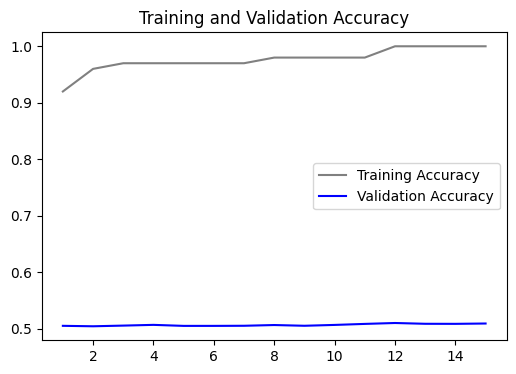

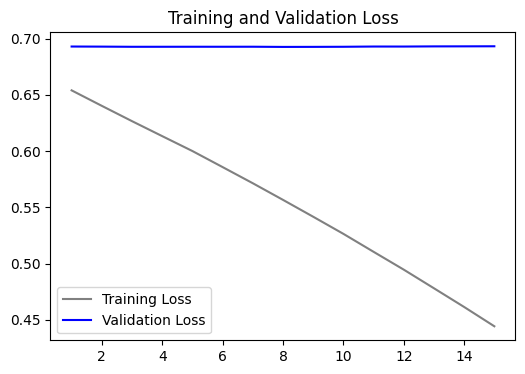

In [45]:
from tensorflow.keras.models import load_model

# Load the saved model
model2 = load_model("model2.keras")
# Access the history of the loaded model
accuracy = history.history['acc']  # using the 'history' variable from model.fit() instead of model1.history
val_accuracy = history.history['val_acc']
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [46]:
test_model = load_model('model2.keras')
Model2_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

157/157 [==============================] - 1s 2ms/step - loss: 0.6917 - acc: 0.5146
Loss: 0.692
Accuracy: 0.515


Due to the fact that the model was only trained with 100 samples, the model has an accurate result of 0.515

MOdel Using Conv1d and Embedding Layer Together

samples:Training - 1000, Validation - 10000 and Test - 5000

In [49]:
numof_words = 10000
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=numof_words)
maximumlen = 150
training_data = pad_sequences(training_data, maxlen=maximumlen)
testing_data = pad_sequences(testing_data, maxlen=maximumlen)

# to Combine the Training and Testing data create an entire dataset
texts = np.concatenate((training_data, testing_data), axis=0)
labels = np.concatenate((training_labels, testing_labels), axis=0)
# Splitting the data into Training and Validation Samples
training_texts, validation_texts, training_labels, validation_labels = train_test_split(texts, labels, train_size=1000, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(testing_data, testing_labels, test_size=5000, random_state=42, stratify=testing_labels)

In [50]:
training_texts.shape

(1000, 150)

In [51]:
validation_texts.shape

(10000, 150)

In [52]:
test_texts.shape

(5000, 150)

Building the network and summary- conv1D along with the embedding layer

In [54]:
model = Sequential()
maxlen = 150
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 512)          12800     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 256)          

In [55]:
history = model.fit(
    training_texts, training_labels,
    epochs=15,
    batch_size=32,
    validation_data=(validation_texts, validation_labels)
)

# Save the model manually after training
model.save("model3.keras")

Epoch 1/15
32/32 [==============================] - 16s 476ms/step - loss: 0.6940 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
32/32 [==============================] - 14s 448ms/step - loss: 0.6936 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/15
32/32 [==============================] - 14s 450ms/step - loss: 0.6930 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5113
Epoch 4/15
32/32 [==============================] - 14s 457ms/step - loss: 0.6928 - accuracy: 0.5070 - val_loss: 0.6930 - val_accuracy: 0.5238
Epoch 5/15
32/32 [==============================] - 15s 470ms/step - loss: 0.6922 - accuracy: 0.5280 - val_loss: 0.6929 - val_accuracy: 0.5036
Epoch 6/15
32/32 [==============================] - 15s 477ms/step - loss: 0.6913 - accuracy: 0.5320 - val_loss: 0.6926 - val_accuracy: 0.5227
Epoch 7/15
32/32 [==============================] - 16s 496ms/step - loss: 0.6919 - accuracy: 0.5110 - val_loss: 0.6925 - val_accuracy: 0.5232

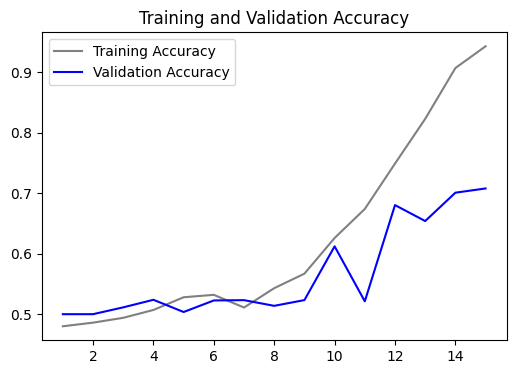

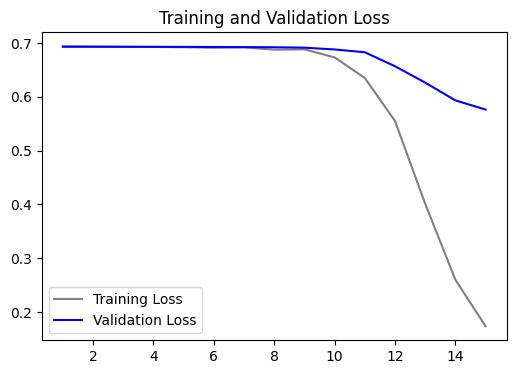

In [59]:
from tensorflow.keras.models import load_model

# Load the saved model
model3 = load_model("model3.keras")

# Access the history of the loaded model (from training `model`, not `model3`)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history["val_loss"]


epochs = range(1, len(loss) + 1)

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [60]:
test_model = load_model('model3.keras')
Model3_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

157/157 [==============================] - 8s 50ms/step - loss: 0.5656 - accuracy: 0.7286
Loss: 0.566
Accuracy: 0.729


We can observe that as soon as we increase the training sample size to 1000 and by building a complex network i.e. using Conv1D along with Embedding actually resulted in 0.729 Accuracy.

Using Conv1D and Embedding Layer Together With Change in Network

samples:Training - 25000, Validation - 10000 and Test - 5000

In [4]:
numof_words = 10000
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=numof_words)
maximumlen = 150
training_data = pad_sequences(training_data, maxlen=maximumlen)
testing_data = pad_sequences(testing_data, maxlen=maximumlen)

# to Combine the Training and Testing data create an entire dataset
texts = np.concatenate((training_data, testing_data), axis=0)
labels = np.concatenate((training_labels, testing_labels), axis=0)
# Splitting the data into Training and Validation Samples
training_texts, validation_texts, training_labels, validation_labels = train_test_split(texts, labels, train_size=25000, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(testing_data, testing_labels, test_size=5000, random_state=42, stratify=testing_labels)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
training_texts.shape

(25000, 150)

In [6]:
validation_texts.shape

(10000, 150)

In [7]:
test_texts.shape

(5000, 150)

Building the network and summary

Conv1d and Dense networks will have an additional layer at the end, along with the embedding vector dimension being changed to 12 and dropout layers being added to all input layers to avoid overfitting.

In [8]:
model = Sequential()
maxlen = 150
model.add(Embedding(10000, 12, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0002)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 12)           120000    
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          18944     
                                                                 
 dropout (Dropout)           (None, 148, 512)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 256)           393472    
                                                                 
 dropout_1 (Dropout)         (None, 72, 256)           0         
                                                        

In [9]:
history = model.fit(
    training_texts, training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(validation_texts, validation_labels)
)

# Save the model manually after training
model.save("model4.keras")

Epoch 1/30
391/391 [==============================] - 55s 95ms/step - loss: 0.6936 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
391/391 [==============================] - 11s 28ms/step - loss: 0.6194 - accuracy: 0.6171 - val_loss: 0.5660 - val_accuracy: 0.8106
Epoch 3/30
391/391 [==============================] - 10s 25ms/step - loss: 0.3590 - accuracy: 0.8462 - val_loss: 0.5094 - val_accuracy: 0.8425
Epoch 4/30
391/391 [==============================] - 7s 18ms/step - loss: 0.2849 - accuracy: 0.8856 - val_loss: 0.4778 - val_accuracy: 0.8351
Epoch 5/30
391/391 [==============================] - 8s 20ms/step - loss: 0.2502 - accuracy: 0.9021 - val_loss: 0.4679 - val_accuracy: 0.8407
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 0.2182 - accuracy: 0.9164 - val_loss: 0.4266 - val_accuracy: 0.8377
Epoch 7/30
391/391 [==============================] - 7s 17ms/step - loss: 0.1932 - accuracy: 0.9284 - val_loss: 0.4257 - val_accuracy: 0.8

Plotting the graph

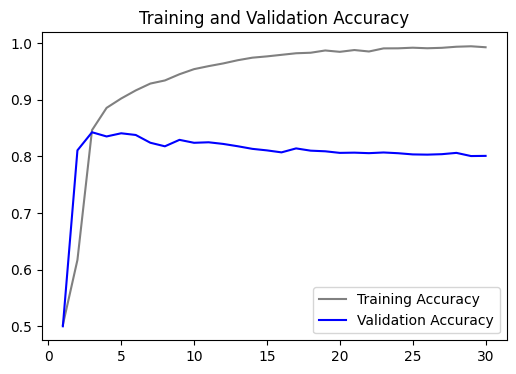

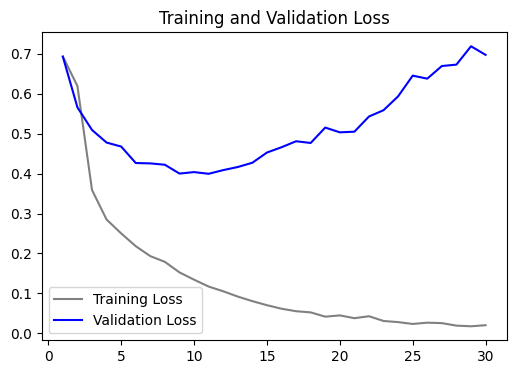

In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
model4 = load_model("model4.keras")

# Access the history of the loaded model (from training `model`, not `model3`)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [13]:
test_model = load_model('model4.keras')
Model4_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8914
Loss: 0.394
Accuracy: 0.891


To avoid overfitting, we added dropout to each layer of the Conv1D network and increased the input layers, followed by adding 2 dense layers with dropout, and with Adam's 0.0002 learning rate as the optimizer. With 25000 training samples and this network, 0.891 accuracy was achieved.

Using Conv1D and Embedding Layer with Change in Embedding Vector

Samples: Training - 35000, Validation - 10000 and Test - 5000

In [19]:
numof_words = 10000
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=numof_words)
maximumlen = 150
training_data = pad_sequences(training_data, maxlen=maximumlen)
testing_data = pad_sequences(testing_data, maxlen=maximumlen)

# to Combine the Training and Testing data create an entire dataset
texts = np.concatenate((training_data, testing_data), axis=0)
labels = np.concatenate((training_labels, testing_labels), axis=0)
# Splitting the data into Training and Validation Samples
training_texts, validation_texts, training_labels, validation_labels = train_test_split(texts, labels, train_size=35000, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(testing_data, testing_labels, test_size=5000, random_state=42, stratify=testing_labels)

In [20]:
training_texts.shape

(35000, 150)

In [21]:
validation_texts.shape

(10000, 150)

In [22]:
test_texts.shape

(5000, 150)

Building the network and also the summary

by chaning the vector size dimension from 12 to 14

In [23]:
model = Sequential()
maxlen = 150
model.add(Embedding(10000, 14, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0002)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 14)           140000    
                                                                 
 conv1d_4 (Conv1D)           (None, 148, 512)          22016     
                                                                 
 dropout_6 (Dropout)         (None, 148, 512)          0         
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 74, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 72, 256)           393472    
                                                                 
 dropout_7 (Dropout)         (None, 72, 256)           0         
                                                      

In [24]:
history = model.fit(
    training_texts, training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(validation_texts, validation_labels)
)

# Save the model manually after training
model.save("model5.keras")

Epoch 1/30
547/547 [==============================] - 46s 77ms/step - loss: 0.6646 - accuracy: 0.5563 - val_loss: 0.5731 - val_accuracy: 0.8078
Epoch 2/30
547/547 [==============================] - 14s 25ms/step - loss: 0.3738 - accuracy: 0.8371 - val_loss: 0.4749 - val_accuracy: 0.8522
Epoch 3/30
547/547 [==============================] - 9s 17ms/step - loss: 0.2907 - accuracy: 0.8809 - val_loss: 0.4511 - val_accuracy: 0.8599
Epoch 4/30
547/547 [==============================] - 10s 18ms/step - loss: 0.2507 - accuracy: 0.8993 - val_loss: 0.4338 - val_accuracy: 0.8548
Epoch 5/30
547/547 [==============================] - 9s 17ms/step - loss: 0.2184 - accuracy: 0.9151 - val_loss: 0.4160 - val_accuracy: 0.8525
Epoch 6/30
547/547 [==============================] - 7s 14ms/step - loss: 0.1947 - accuracy: 0.9259 - val_loss: 0.3916 - val_accuracy: 0.8529
Epoch 7/30
547/547 [==============================] - 7s 13ms/step - loss: 0.1687 - accuracy: 0.9376 - val_loss: 0.3801 - val_accuracy: 0.8

Plotting the graph

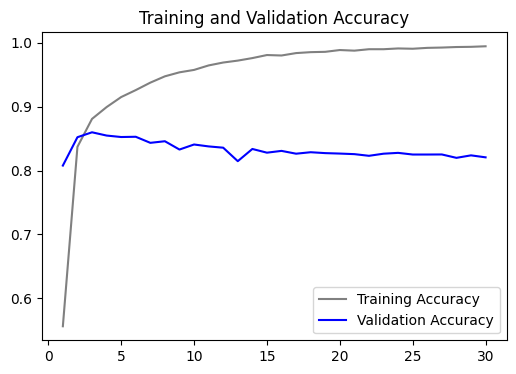

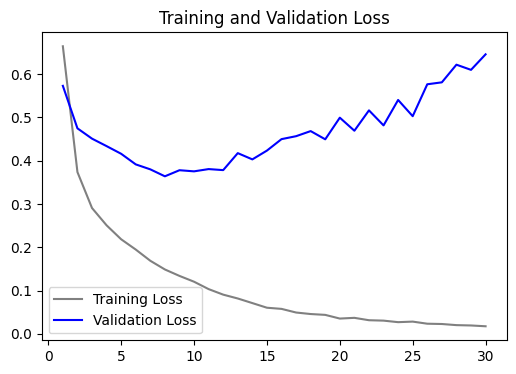

In [25]:
from tensorflow.keras.models import load_model

# Load the saved model
model5 = load_model("model5.keras")

# Access the history of the loaded model (from training `model`, not `model3`)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [26]:
test_model = load_model('model5.keras')
Model5_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.2059 - accuracy: 0.9426
Loss: 0.206
Accuracy: 0.943


The accuracy for the model is increased from 0.891 to 0.943 which is best one we achieved till now. Just by changing the vector dimension from 12 to 14 with using 1000 samples more.

The embedding vector dimension can therefore be considered a key hyperparameter to play around with during network building. However, if this parameter is set too high, the models may overfit, and viceversa.So, the value thus chosen should be based on the size of the dataset and the end-optimization goal.
Not only can the embedding vector dimension be adjusted but also dropout rate, directional inputs, dense layers, and learning rate can be fine-tuned.

Evaluating the best model

In [28]:
Models = ['Mod 2', 'Mod 3', 'Mod 4', 'Mod5']
Loss = [0.692,0.566,0.394,0.206]
Accuracy = [0.575,0.729,0.891,0.943]

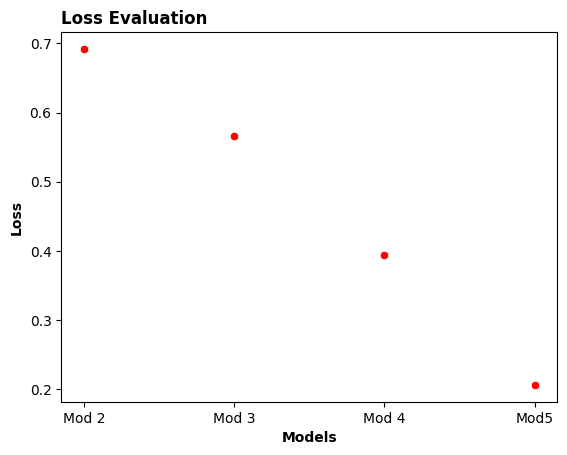

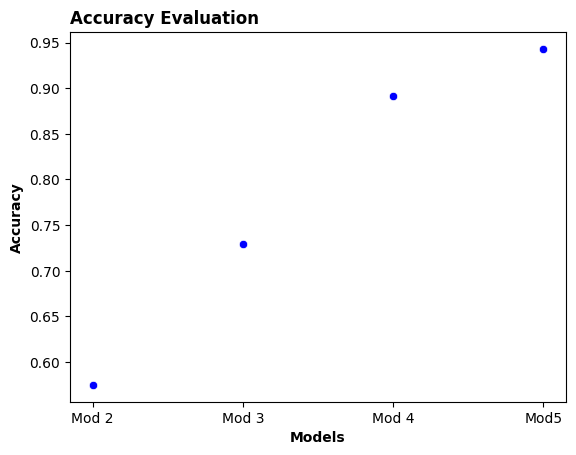

In [31]:
# Loss Evaluation
sns.scatterplot(x=Models, y=Loss, color='red')
plt.xlabel("Models",fontdict={"size":10,"weight":'bold'})
plt.ylabel("Loss",fontdict={"size":10,"weight":'bold'})
plt.title("Loss Evaluation",loc='left',fontdict={"size":12,"weight":'bold'})
plt.show()

# Accuracy Evaluation
sns.scatterplot(x=Models, y=Accuracy,color='blue')
plt.xlabel("Models",fontdict={"size":10,"weight":'bold'})
plt.ylabel("Accuracy",fontdict={"size":10,"weight":'bold'})
plt.title("Accuracy Evaluation",loc='left',fontdict={"size":12,"weight":'bold'})
plt.show()

We can clearly conclude that the Model 5 achieved the best accuracy which is 0.943.This accuracy was obtained when the training sample was set to 35000, validation to 10000 and test to 5000. We used Conv1D and Embedding Layer together, the network architecture can be referred by looking at the model summary.

PreTrained Models

loading in the IMDB .tar file to the colab environment

In [38]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  5042k      0  0:00:16  0:00:16 --:--:-- 8699k


In [39]:
!rm -r aclImdb/train/unsup

In [40]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [41]:
print('No. of Samples', len(texts))

No. of Samples 25000


In [42]:
maximumlen = 150
training_samples = 100
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maximumlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [43]:
x_train.shape

(100, 150)

In [44]:
x_val.shape

(10000, 150)

Loading the pretrained-word embedding file

In [77]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-29 18:17:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-29 18:17:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-29 18:17:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.4’

gl

In [78]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


Preparing the GloVe word-embeddings matrix

In [79]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Building the model and summary:

In [80]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [89]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Epoch 1/10
4/4 [==============================] - 9s 2s/step - loss: 0.6872 - acc: 0.5500 - val_loss: 0.7300 - val_acc: 0.4982
Epoch 2/10
4/4 [==============================] - 3s 864ms/step - loss: 0.6602 - acc: 0.5900 - val_loss: 0.7342 - val_acc: 0.4982
Epoch 3/10
4/4 [==============================] - 3s 864ms/step - loss: 0.6490 - acc: 0.5900 - val_loss: 0.7160 - val_acc: 0.4982
Epoch 4/10
4/4 [==============================] - 5s 2s/step - loss: 0.6334 - acc: 0.6200 - val_loss: 0.7199 - val_acc: 0.4989
Epoch 5/10
4/4 [==============================] - 3s 849ms/step - loss: 0.6205 - acc: 0.6100 - val_loss: 0.6883 - val_acc: 0.5387
Epoch 6/10
4/4 [==============================] - 3s 864ms/step - loss: 0.6110 - acc: 0.7300 - val_loss: 0.6995 - val_acc: 0.5104
Epoch 7/10
4/4 [==============================] - 3s 834ms/step - loss: 0.5967 - acc: 0.7100 - val_loss: 0.7273 - val_acc: 0.5005
Epoch 8/10
4/4 [==============================] - 2s 815ms/step - loss: 0.5891 - acc: 0.6800 - v

Plotting the graph

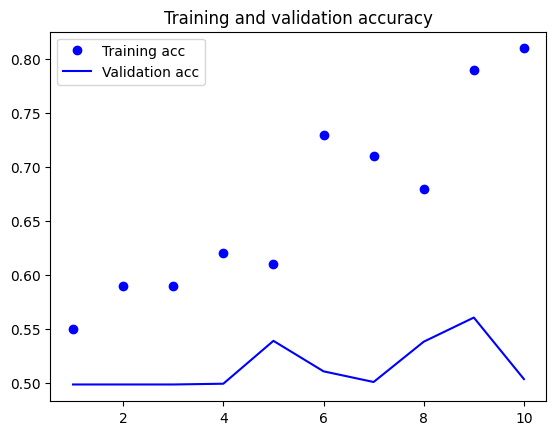

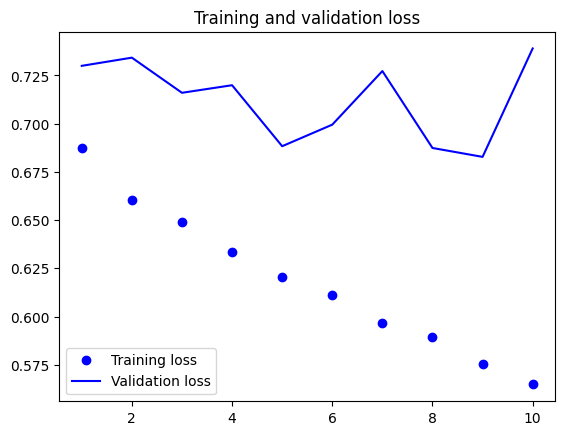

In [92]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [95]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

In [96]:
x_test.shape

(5000, 150)

In [98]:
maxlen = 150
training_samples = 1000
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [99]:
x_train.shape

(1000, 150)

In [100]:
x_val.shape

(10000, 150)

In [101]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 150, 512)          1255424   
                                                                 
 dropout_12 (Dropout)        (None, 150, 512)          0         
                                                                 
 lstm_2 (LSTM)               (None, 150, 256)          787456    
                                                                 
 dropout_13 (Dropout)        (None, 150, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150, 128)          197120    
                                                                 
 dropout_14 (Dropout)        (None, 150, 128)         

In [104]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model2.h5")

Epoch 1/10
32/32 [==============================] - 75s 259ms/step - loss: 0.7056 - acc: 0.5240 - val_loss: 0.7026 - val_acc: 0.4990
Epoch 2/10
32/32 [==============================] - 6s 185ms/step - loss: 0.7107 - acc: 0.4820 - val_loss: 0.6949 - val_acc: 0.4990
Epoch 3/10
32/32 [==============================] - 6s 198ms/step - loss: 0.7020 - acc: 0.4980 - val_loss: 0.6934 - val_acc: 0.5010
Epoch 4/10
32/32 [==============================] - 6s 190ms/step - loss: 0.6982 - acc: 0.5110 - val_loss: 0.7084 - val_acc: 0.4990
Epoch 5/10
32/32 [==============================] - 6s 187ms/step - loss: 0.6995 - acc: 0.5030 - val_loss: 0.6968 - val_acc: 0.5010
Epoch 6/10
32/32 [==============================] - 6s 183ms/step - loss: 0.6990 - acc: 0.5130 - val_loss: 0.6935 - val_acc: 0.4990
Epoch 7/10
32/32 [==============================] - 6s 189ms/step - loss: 0.6993 - acc: 0.4620 - val_loss: 0.6961 - val_acc: 0.5010
Epoch 8/10
32/32 [==============================] - 6s 198ms/step - loss: 0

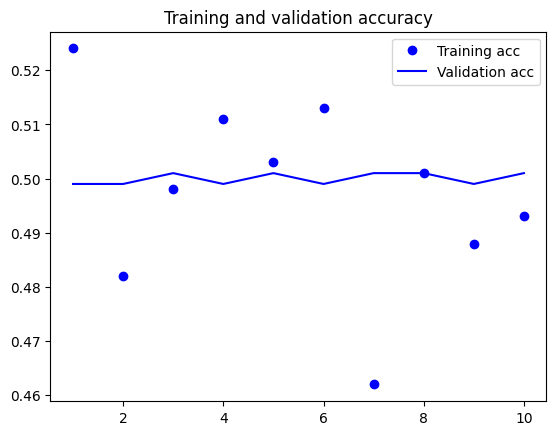

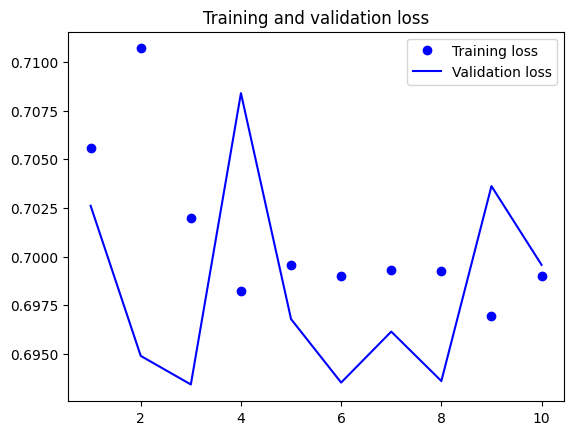

In [105]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Pre-trained model with 10000 samples


In [106]:
maxlen = 150
training_samples = 10000
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [107]:
x_train.shape

(10000, 150)

In [108]:
x_val.shape

(10000, 150)

building the network and summary

In [111]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_9 (LSTM)               (None, 150, 64)           42240     
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1056833 (4.03 MB)
Trainable params: 5683

In [112]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model3.h5")

Epoch 1/10
313/313 [==============================] - 561s 2s/step - loss: 0.6958 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.4953
Epoch 2/10
313/313 [==============================] - 529s 2s/step - loss: 0.6939 - acc: 0.5044 - val_loss: 0.6939 - val_acc: 0.5052
Epoch 3/10
313/313 [==============================] - 525s 2s/step - loss: 0.6932 - acc: 0.5094 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 4/10
313/313 [==============================] - 515s 2s/step - loss: 0.6937 - acc: 0.5051 - val_loss: 0.6932 - val_acc: 0.5020
Epoch 5/10
313/313 [==============================] - 519s 2s/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6948 - val_acc: 0.4939
Epoch 6/10
313/313 [==============================] - 523s 2s/step - loss: 0.6930 - acc: 0.5120 - val_loss: 0.6938 - val_acc: 0.5073
Epoch 7/10
313/313 [==============================] - 515s 2s/step - loss: 0.6924 - acc: 0.5094 - val_loss: 0.6943 - val_acc: 0.5035
Epoch 8/10
313/313 [==============================] - 529s 2s/step - 

Plotting the graph

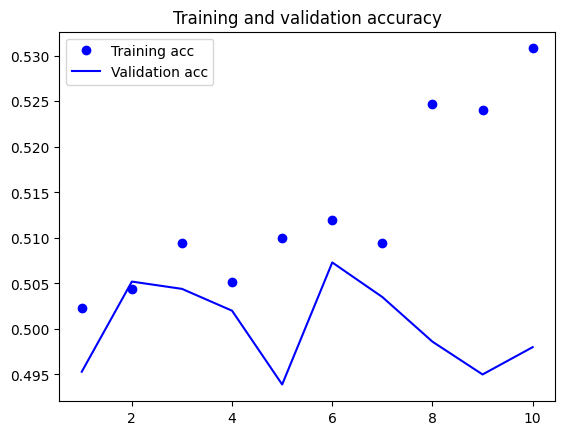

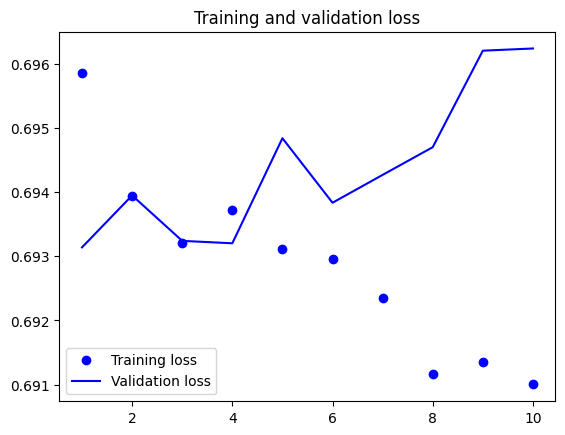

In [113]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Pre-trained model with 15000 samples

In [114]:
maxlen = 150
training_samples = 15000
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [115]:
x_train.shape

(15000, 150)

In [116]:
x_val.shape

(10000, 150)

Building the model and summary

In [117]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_11 (LSTM)              (None, 150, 256)          365568    
                                                                 
 dropout_20 (Dropout)        (None, 150, 256)          0         
                                                                 
 lstm_12 (LSTM)              (None, 150, 128)          197120    
                                                                 
 dropout_21 (Dropout)        (None, 150, 128)          0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dense_16 (Dense)            (None, 256)              

In [118]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model4.h5")

Epoch 1/10
469/469 [==============================] - 24s 36ms/step - loss: 0.6976 - acc: 0.5063 - val_loss: 0.6946 - val_acc: 0.4997
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.6951 - acc: 0.5005 - val_loss: 0.6940 - val_acc: 0.4998
Epoch 3/10
469/469 [==============================] - 16s 33ms/step - loss: 0.6945 - acc: 0.5039 - val_loss: 0.6935 - val_acc: 0.4997
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.6943 - acc: 0.4990 - val_loss: 0.6935 - val_acc: 0.4998
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.6938 - acc: 0.5070 - val_loss: 0.6951 - val_acc: 0.5002
Epoch 6/10
469/469 [==============================] - 15s 33ms/step - loss: 0.6939 - acc: 0.5019 - val_loss: 0.6935 - val_acc: 0.4999
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.6937 - acc: 0.5043 - val_loss: 0.6930 - val_acc: 0.5068
Epoch 8/10
469/469 [==============================] - 13s 29ms

plotting the graph

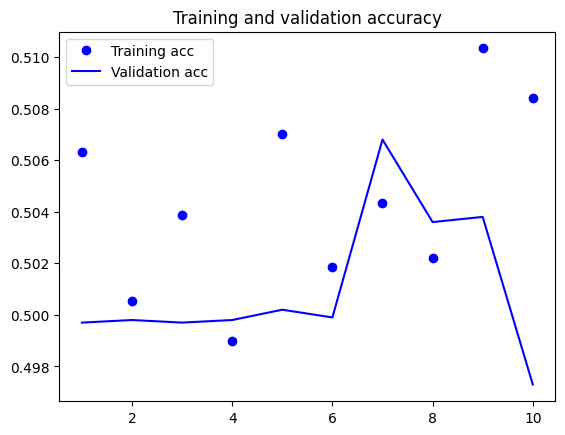

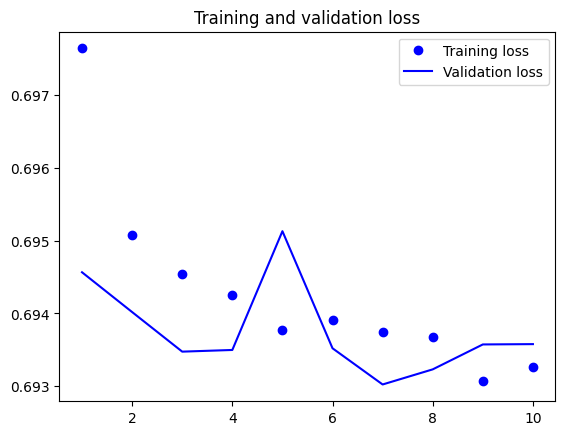

In [119]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Our next model will try to reduce the complexity of the model to see if it also generalizes well on the unseen data, since as we increase the training samples, the model complexity increases, so our performance on the test set declines.

PreModel 5 Reducing the complexity in the model, 15000 Training Samples

In [121]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(LSTM(128))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the Model
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_15 (LSTM)              (None, 128)               117248    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dropout_26 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1150529 (4.39 MB)
Trainable params: 1505

In [122]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
#Training and Evaluating the Model
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["acc"])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model5.h5")

Epoch 1/10
469/469 [==============================] - 10s 13ms/step - loss: 0.6983 - acc: 0.4937 - val_loss: 0.6933 - val_acc: 0.5064
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6942 - acc: 0.5083 - val_loss: 0.6941 - val_acc: 0.4994
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6941 - acc: 0.5057 - val_loss: 0.6945 - val_acc: 0.5047
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.6931 - acc: 0.5135 - val_loss: 0.6929 - val_acc: 0.5050
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6917 - acc: 0.5203 - val_loss: 0.6942 - val_acc: 0.5047
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6920 - acc: 0.5215 - val_loss: 0.6943 - val_acc: 0.5022
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6904 - acc: 0.5314 - val_loss: 0.6945 - val_acc: 0.5080
Epoch 8/10
469/469 [==============================] - 7s 15ms/step -

In [126]:
Models = ['Pre2','Pre3','Pre4','Pre5']
Loss = [ 0.690, 0.691,0.693, 0.432]
Accuracy = [ 0.730, 0.530, 0.493,0.810]

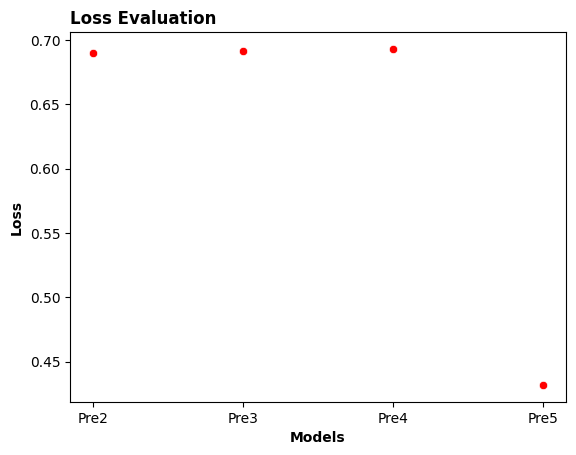

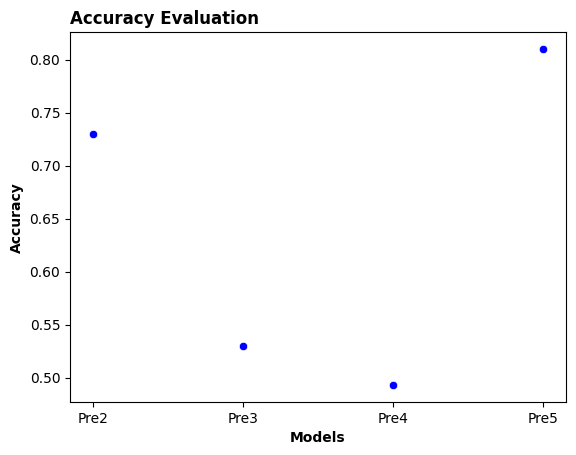

In [127]:
#Loss Evaluation
sns.scatterplot(x=Models, y=Loss, color='red')
plt.xlabel("Models",fontdict={"size":10,"weight":'bold'})
plt.ylabel("Loss",fontdict={"size":10,"weight":'bold'})
plt.title("Loss Evaluation",loc='left',fontdict={"size":12,"weight":'bold'})
plt.show()

# Accuracy Evaluation
sns.scatterplot(x=Models, y=Accuracy,color='blue')
plt.xlabel("Models",fontdict={"size":10,"weight":'bold'})
plt.ylabel("Accuracy",fontdict={"size":10,"weight":'bold'})
plt.title("Accuracy Evaluation",loc='left',fontdict={"size":12,"weight":'bold'})
plt.show()

Based on the above plots, PreModel 5 has been deemed to be the best performing model among the rest. It was trained on 15000 samples and has a less complex network. At times less complex models i.e. simple models are proved to be the best performers when compared with other models

As a result of the underfitting in all the Pre_Trained Models, they performed poorly on unseen data, since they were unable to learn patterns and understand the meaning of the data that they had already seen. It is therefore expected that their performance would be much lower on unseen data, which is what happened.As a result of training on the data it has seen, the final model was determined to be the best of the pre-trained models.